In [1]:
import numpy as np
import matplotlib.pyplot as plt

import stochnewton

from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer

In [3]:
import imp
imp.reload(stochnewton)

<module 'stochnewton' from 'C:\\Users\\Denis\\pythonProject\\Jupyter_Main\\Учеба\\6_семестр\\Статья\\Baseline algorithm\\stochnewton.py'>

$f(x_i) = \log(1 + \exp(-b_i \cdot a^T x)),\quad b_i = \pm 1$

Пока что в качестве оптимального значения будем брать результат детерминированного алгоритма Ньютона

Простой датасет - ирисы

In [4]:
A, b = load_iris(return_X_y=True)
b = np.clip(b, 0, 1) * 2 - 1

In [5]:
A.shape

(150, 4)

In [6]:
np.unique(b)

array([-1,  1])

In [7]:
opt = stochnewton.DeterministicNewtonLogReg(A, b, l2=0.01)
opt.run(n_iterations=20, plot_loss=False)
opt_value = opt.calculate_loss()

In [8]:
opt_value

0.05844114747617182

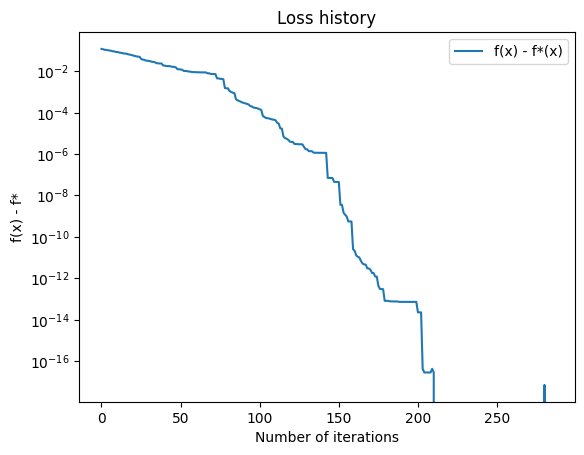

In [9]:
opt = stochnewton.StochasticNewtonLogReg(A, b, l2=0.01, opt_value=opt_value)
opt.run(n_iterations=300, batch_size=10)

Более сложный датасет

In [10]:
A, b = load_breast_cancer(return_X_y=True)
b = b * 2 - 1

In [11]:
A.shape

(569, 30)

In [12]:
np.unique(b)

array([-1,  1])

In [13]:
opt = stochnewton.DeterministicNewtonLogReg(A, b, l2=0.01)
opt.run(n_iterations=20, plot_loss=False)
opt_value = opt.calculate_loss()

In [14]:
opt_value

0.1283387051642542

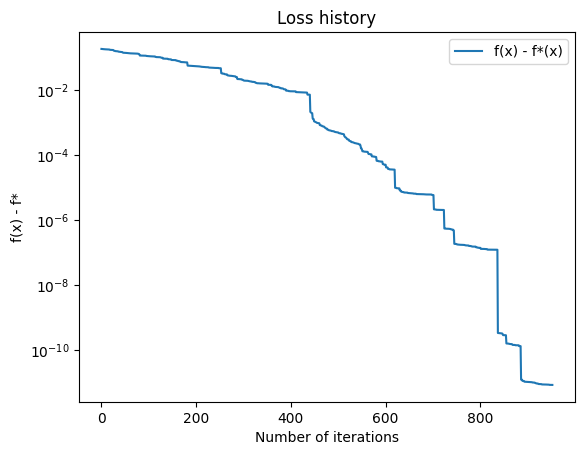

In [15]:
opt = stochnewton.StochasticNewtonLogReg(A, b, l2=0.01, opt_value=opt_value)
opt.run(n_iterations=1000, batch_size=10)

Теперь попробуем построить графики для разных $l_2$ (снова датасет ирисов)

In [16]:
A, b = load_iris(return_X_y=True)
b = np.clip(b, 0, 1) * 2 - 1

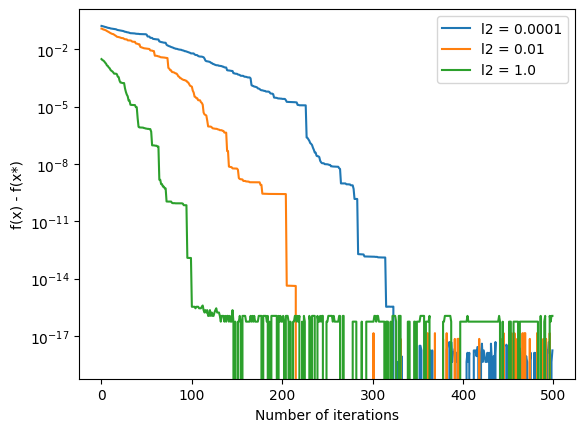

In [17]:
l2_grid = [1e-4, 1e-2, 1e-0]

for l2 in l2_grid:
    deterministic_opt = stochnewton.DeterministicNewtonLogReg(A, b, l2=l2)
    deterministic_opt.run(n_iterations=20, plot_loss=False)
    opt_value = deterministic_opt.calculate_loss()
    opt = stochnewton.StochasticNewtonLogReg(A, b, l2=l2, opt_value=opt_value)
    opt.run(n_iterations=500, batch_size=10, plot_loss=False)
    plt.plot(np.array(opt.loss_history) - opt_value, label=f'l2 = {l2}')
    plt.xlabel('Number of iterations')
    plt.ylabel('f(x) - f(x*)')
    plt.yscale('log')
    plt.legend()